In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/110.0.5481.78"})
    soup=bts(result.text,"html.parser")
    return soup

In [6]:
pages=["https://www.hepsiemlak.com/istanbul-kiralik"]
for page in range(2,466):
    pages.append("https://www.hepsiemlak.com/istanbul-kiralik?page=" +str (page))
    
pages

['https://www.hepsiemlak.com/istanbul-kiralik',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=2',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=3',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=4',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=5',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=6',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=7',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=8',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=9',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=10',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=11',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=12',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=13',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=14',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=15',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=16',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=17',
 'https://www.hepsiemlak.com/istanbul-kiralik?page=18',
 'https:

In [1]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for sonuc in html.findAll("a",{"class":"card-link"}):
        links.append("https://www.hepsiemlak.com" + sonuc.get("href"))

links

NameError: name 'pages' is not defined

In [8]:
ex=getAndParseURL("https://www.hepsiemlak.com/istanbul-sariyer-resitpasa-kiralik/daire/6485-6245")

In [136]:
ex.find("p",{"class":"fontRB fz24 price"}).text.replace("TL","").replace(".","").strip()

'15000'

In [103]:
ex.find("div", {"class":"container det-container"}).find(text=re.compile("Aidat")).findNext().text.replace("TL","").replace(".","").strip()

'100'

In [133]:
ex.find("div", {"class":"container det-container"}).find(text=re.compile("Depozito")).findNext().text.replace("TL","").replace(".","").strip()

'15000'

In [129]:
ex.find("div", {"class":"container det-container"}).find(text=re.compile("Bina Yaşı")).findNext().text.strip()

'11 Yaşında'

In [27]:
ex.find("div", {"class":"container det-container"}).find(text=re.compile("Brüt / Net M2")).findNext().text.replace("m2","").strip()

'115'

In [115]:
ex.find("div", {"class":"container det-container"}).find(text=re.compile("Banyo Sayısı")).findNext().text.strip()

'1'

In [130]:
ex.find("div", {"class":"container det-container"}).find(text=re.compile("Bulunduğu Kat")).findNext().text.strip()

'Ara Kat'

In [131]:
ex.find("div", {"class":"container det-container"}).find(text=re.compile("Kat Sayısı")).findNext().text.strip()

'3 Katlı'

In [128]:
ex.find("ul", {"class":"short-info-list"}).find(text=re.compile("Daire")).findNext().text.replace(" ","").replace("\n","")

'3+1'

In [135]:
ex.find("div", {"class":"det-title-bottom"}).find(text=re.compile("İstanbul")).findNext().text.strip()

'Sarıyer'

In [132]:
ex.find("div", {"class":"container det-container"}).find(text=re.compile("Yakıt Tipi")).findNext().text.strip()

'Doğalgaz'

In [137]:
result = []
for sonuc in links:
    html = getAndParseURL(sonuc)
    
    try:
        disctrict = html.find("div", {"class":"det-title-bottom"}).find(text=re.compile("İstanbul")).findNext().text.strip()
    except:
        disctrict = np.nan
    try:
        rent= html.find("p",{"class":"fontRB fz24 price"}).text.replace("TL","").replace(".","").strip()
    except:
        rent = np.nan
    try:
        net_area = html.find("div", {"class":"container det-container"}).find(text=re.compile("Brüt / Net M2")).findNext().text.replace("m2","").strip()
    except:
        net_area = np.nan
    try:
        rooms = html.find("ul", {"class":"short-info-list"}).find(text=re.compile("Daire")).findNext().text.replace(" ","").replace("\n","")
    except:
        rooms = np.nan
    try:
        bath = html.find("div", {"class":"container det-container"}).find(text=re.compile("Banyo Sayısı")).findNext().text.strip()
    except:
        bath = np.nan
    try:
        number_of_floors = html.find("div", {"class":"container det-container"}).find(text=re.compile("Kat Sayısı")).findNext().text.strip()
    except:
        number_of_floors = np.nan
    try:
        floor = html.find("div", {"class":"container det-container"}).find(text=re.compile("Bulunduğu Kat")).findNext().text.strip()
    except:
        floor = np.nan
    try:
        heat_type = html.find("div", {"class":"container det-container"}).find(text=re.compile("Yakıt Tipi")).findNext().text.strip()
    except:
        heat_type = np.nan
    try:
        age_of_flat = html.find("div", {"class":"container det-container"}).find(text=re.compile("Bina Yaşı")).findNext().text.strip()
    except:
        age_of_flat = np.nan
    try:
        dues = html.find("div", {"class":"container det-container"}).find(text=re.compile("Aidat")).findNext().text.replace("TL","").replace(".","").strip()
    except:
        dues = np.nan
    try:
        deposit = html.find("div", {"class":"container det-container"}).find(text=re.compile("Depozito")).findNext().text.replace("TL","").replace(".","").strip()
    except:
        deposit = np.nan
    time.sleep(2)
    
    result.append([disctrict,rent,net_area,rooms,bath,number_of_floors,floor,heat_type,age_of_flat,dues,deposit])
    
columns = ["District","Rent","Net Area","Rooms","Bath","NOF","FLOOR","Heat Type","Age","Dues","Deposit"]
df = pd.DataFrame.from_records(result, columns=columns)

In [167]:
df=pd.read_csv("./hepsirent_df.csv")

In [4]:
df.head()

,Unnamed: 0,District,Rent,Net Area,Rooms,Bath,NOF,FLOOR,Heat Type,Age,Dues,Deposit
0,0,Sarıyer,85000.0,400.0,NaN,5.0,5 Katlı,NaN,Doğalgaz,10 Yaşında,6000,170000
1,1,Beşiktaş,250000.0,495.0,4+1,1.0,5 Katlı,Bahçe Katı,Doğalgaz,2 Yaşında,NaN,NaN
2,2,Beşiktaş,200000.0,262.0,3+1,3.0,5 Katlı,Bahçe Katı,Doğalgaz,4 Yaşında,NaN,NaN
3,3,Beşiktaş,130000.0,228.0,3+1,2.0,5 Katlı,2. Kat,Doğalgaz,4 Yaşında,NaN,NaN
4,4,Beşiktaş,160000.0,228.0,3+1,2.0,5 Katlı,Ara Kat,Doğalgaz,2 Yaşında,NaN,NaN


In [5]:
df.tail()

,Unnamed: 0,District,Rent,Net Area,Rooms,Bath,NOF,FLOOR,Heat Type,Age,Dues,Deposit
11139,11139,Bahçelievler,8750.0,70.0,2+1,1.0,5 Katlı,Yüksek Giriş,Doğalgaz,4 Yaşında,NaN,NaN
11140,11140,Kartal,3500.0,60.0,1+1,1.0,3 Katlı,Yüksek Giriş,NaN,31 Yaşında,10,NaN
11141,11141,Kartal,6500.0,60.0,1+1,1.0,2 Katlı,2. Kat,NaN,26 Yaşında,30,NaN
11142,11142,Beykoz,40000.0,837.0,NaN,5.0,3 Katlı,NaN,Doğalgaz,18 Yaşında,2100,80000
11143,11143,Şişli,15000.0,30.0,1+0,1.0,5 Katlı,1. Kat,Doğalgaz,15 Yaşında,NaN,15000


In [62]:
df.isnull().sum()

Unnamed: 0    0
District      0
Rent          0
Net Area      0
Rooms         0
Bath          0
NOF           0
FLOOR         0
Heat Type     0
Age           0
Dues          0
Deposit       0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9884 entries, 8 to 11143
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9884 non-null   int64  
 1   District    9884 non-null   object 
 2   Rent        9884 non-null   float64
 3   Net Area    9884 non-null   float64
 4   Rooms       9884 non-null   object 
 5   Bath        9884 non-null   object 
 6   NOF         9884 non-null   object 
 7   FLOOR       9884 non-null   object 
 8   Heat Type   9884 non-null   object 
 9   Age         9884 non-null   object 
 10  Dues        9884 non-null   object 
 11  Deposit     9884 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1003.8+ KB


In [220]:
df.columns

Index(['District', 'Rent', 'Net Area', 'Rooms', 'Bath', 'NOF', 'FLOOR',
       'Heat Type', 'Age', 'Dues', 'Deposit'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()

In [158]:
df.head()

,Unnamed: 0,District,Rent,Net Area,Rooms,Bath,NOF,FLOOR,Heat Type,Age,Dues,Deposit
0,0,Sarıyer,85000.0,400.0,NaN,5.0,5 Katlı,NaN,Doğalgaz,10 Yaşında,6000,170000
1,1,Beşiktaş,250000.0,495.0,4+1,1.0,5 Katlı,Bahçe Katı,Doğalgaz,2 Yaşında,NaN,NaN
2,2,Beşiktaş,200000.0,262.0,3+1,3.0,5 Katlı,Bahçe Katı,Doğalgaz,4 Yaşında,NaN,NaN
3,3,Beşiktaş,130000.0,228.0,3+1,2.0,5 Katlı,2. Kat,Doğalgaz,4 Yaşında,NaN,NaN
4,4,Beşiktaş,160000.0,228.0,3+1,2.0,5 Katlı,Ara Kat,Doğalgaz,2 Yaşında,NaN,NaN


In [43]:
df.describe()

,Unnamed: 0,Rent,Net Area,Bath,Deposit
count,9884.000000,9884.000000,9884.000000,9881.000000,9.870000e+03
mean,5421.319709,22462.563234,125.671517,1.441453,1.872929e+04
std,3176.481416,16588.107730,73.369104,0.934298,5.539807e+05
min,8.000000,5000.000000,1.000000,1.000000,0.000000e+00
25%,2675.750000,10687.500000,80.000000,1.000000,0.000000e+00
50%,5370.500000,16100.000000,110.000000,1.000000,0.000000e+00
75%,8128.250000,28000.000000,145.000000,2.000000,1.800000e+04
max,11143.000000,80000.000000,865.000000,50.000000,5.500000e+07


In [7]:
df=df.fillna({"District":"Unknown"})


In [51]:
df=df.fillna({"Heat Type":"Unknown"})
df=df.fillna({"Rooms":"Unknown"})
df=df.fillna({"Bath":"0"})

In [54]:
df=df.fillna({"NOF":"Unknown"})
df=df.fillna({"FLOOR":"Unknown"})

In [55]:
df["Net Area"]=df["Net Area"].fillna(df["Net Area"].mean())

In [40]:
df["Rent"]=df["Rent"].fillna(df["Rent"].mean())

In [119]:
df["Rent"].mean()

22448.06774324599

In [59]:
df=df.fillna({"Deposit":"0"})

In [60]:
df=df.fillna({"Dues":"0"})

In [122]:
df['Deposit'] = pd.to_numeric(df['Deposit'], errors='coerce')

In [126]:
df= df.loc[(df["Rent"] >= 5000) & (df["Rent"] <= 80000),:]

In [127]:
df= df.loc[(df["Deposit"] >= 5000) & (df["Deposit"] <= 100000),:]

In [128]:
df= df.loc[(df["Dues"] >= 50) & (df["Dues"] <= 5000),:]

In [129]:
df["Deposit"].mean()

25956.79042161277

In [130]:
df['Dues'] = pd.to_numeric(df['Dues'], errors='coerce')
df["Dues"].mean()

500.2189930413426

In [107]:
df.head()

,index,District,Rent,Net Area,Rooms,Bath,NOF,FLOOR,Heat Type,Age,Dues,Deposit
0,0,Kağıthane,30000.0,85.0,2+1,1.0,5 Katlı,3. Kat,Doğalgaz,Sıfır Bina,0.0,0.0
1,1,Kağıthane,25000.0,70.0,1+1,1.0,5 Katlı,3. Kat,Doğalgaz,Sıfır Bina,0.0,0.0
2,2,Ümraniye,9500.0,50.0,1+1,1.0,4 Katlı,Bahçe Katı,Unknown,5 Yaşında,0.0,0.0
3,3,Kağıthane,30000.0,110.0,1+1,1.0,5 Katlı,5. Kat,Doğalgaz,Sıfır Bina,0.0,0.0
4,4,Beşiktaş,36000.0,135.0,2+1,2.0,4 Katlı,1. Kat,Doğalgaz,23 Yaşında,0.0,38000.0


In [106]:
df.tail()

,index,District,Rent,Net Area,Rooms,Bath,NOF,FLOOR,Heat Type,Age,Dues,Deposit
9841,9841,Fatih,11000.0,90.0,3+1,2.0,6 Katlı,En Üst Kat,Doğalgaz,30 Yaşında,0.0,0.0
9842,9842,Bahçelievler,8750.0,70.0,2+1,1.0,5 Katlı,Yüksek Giriş,Doğalgaz,4 Yaşında,0.0,0.0
9843,9843,Kartal,6500.0,60.0,1+1,1.0,2 Katlı,2. Kat,Unknown,26 Yaşında,30.0,0.0
9844,9844,Beykoz,40000.0,837.0,Unknown,5.0,3 Katlı,Unknown,Doğalgaz,18 Yaşında,2100.0,80000.0
9845,9845,Şişli,15000.0,30.0,1+0,1.0,5 Katlı,1. Kat,Doğalgaz,15 Yaşında,0.0,15000.0


In [2]:
df =pd.read_csv("./LATEST_VERSION.csv")

In [ ]:
df.co

In [3]:
df.head()

,Unnamed: 0,District,Rent,Net Area,Rooms,Bath,NOF,FLOOR,Heat Type,Age,Dues,Deposit
0,0,Kağıthane,30000.0,85.0,2+1,1.0,5 Katlı,3. Kat,Doğalgaz,Sıfır Bina,0.0,0.0
1,1,Kağıthane,25000.0,70.0,1+1,1.0,5 Katlı,3. Kat,Doğalgaz,Sıfır Bina,0.0,0.0
2,2,Ümraniye,9500.0,50.0,1+1,1.0,4 Katlı,Bahçe Katı,Unknown,5 Yaşında,0.0,0.0
3,3,Kağıthane,30000.0,110.0,1+1,1.0,5 Katlı,5. Kat,Doğalgaz,Sıfır Bina,0.0,0.0
4,4,Beşiktaş,36000.0,135.0,2+1,2.0,4 Katlı,1. Kat,Doğalgaz,23 Yaşında,0.0,38000.0


In [4]:
df.tail()

,Unnamed: 0,District,Rent,Net Area,Rooms,Bath,NOF,FLOOR,Heat Type,Age,Dues,Deposit
9841,9841,Fatih,11000.0,90.0,3+1,2.0,6 Katlı,En Üst Kat,Doğalgaz,30 Yaşında,0.0,0.0
9842,9842,Bahçelievler,8750.0,70.0,2+1,1.0,5 Katlı,Yüksek Giriş,Doğalgaz,4 Yaşında,0.0,0.0
9843,9843,Kartal,6500.0,60.0,1+1,1.0,2 Katlı,2. Kat,Unknown,26 Yaşında,30.0,0.0
9844,9844,Beykoz,40000.0,837.0,Unknown,5.0,3 Katlı,Unknown,Doğalgaz,18 Yaşında,2100.0,80000.0
9845,9845,Şişli,15000.0,30.0,1+0,1.0,5 Katlı,1. Kat,Doğalgaz,15 Yaşında,0.0,15000.0


In [238]:
df=df.drop(["Unnamed: 0"],axis=1)

In [6]:
df.head()

,District,Rent,Net Area,Rooms,Bath,NOF,FLOOR,Heat Type,Age,Dues,Deposit
0,Kağıthane,30000.0,85.0,2+1,1.0,5 Katlı,3. Kat,Doğalgaz,Sıfır Bina,0.0,0.0
1,Kağıthane,25000.0,70.0,1+1,1.0,5 Katlı,3. Kat,Doğalgaz,Sıfır Bina,0.0,0.0
2,Ümraniye,9500.0,50.0,1+1,1.0,4 Katlı,Bahçe Katı,Unknown,5 Yaşında,0.0,0.0
3,Kağıthane,30000.0,110.0,1+1,1.0,5 Katlı,5. Kat,Doğalgaz,Sıfır Bina,0.0,0.0
4,Beşiktaş,36000.0,135.0,2+1,2.0,4 Katlı,1. Kat,Doğalgaz,23 Yaşında,0.0,38000.0


In [201]:
grouped=df.groupby("District")["Rent"].mean().sort_values(ascending=False)
gropued2=df.groupby("District")["Deposit"].mean().sort_values(ascending=False)
groped3=df.groupby("District")["Dues"].mean().sort_values(ascending=False)

In [202]:
display(grouped)

District
Beşiktaş         36789.590634
Sarıyer          36119.185357
Bakırköy         29155.890052
Beykoz           28689.636364
Şişli            27251.396861
Kadıköy          25888.053691
Beyoğlu          25811.417722
Üsküdar          22127.292419
Eyüpsultan       21012.302491
Kağıthane        20212.568000
Adalar           18946.938776
Gaziosmanpaşa    18090.581197
Maltepe          17307.442553
Başakşehir       17158.278049
Ataşehir         17001.874525
Büyükçekmece     16120.053476
Şile             15479.166667
Kartal           15395.900621
Beylikdüzü       15363.175258
Zeytinburnu      15191.729323
Tuzla            15164.893617
Ümraniye         14970.615385
Çekmeköy         14638.888889
Bayrampaşa       14255.128205
Silivri          13800.609756
Güngören         13199.350649
Çatalca          13142.857143
Bağcılar         12856.000000
Sultangazi       12312.500000
Küçükçekmece     12274.895582
Sancaktepe       11751.086957
Esenler          11518.181818
Fatih            11437.192412
B

In [243]:
df["Rent"].mean()

22448.06774324599

<AxesSubplot: >

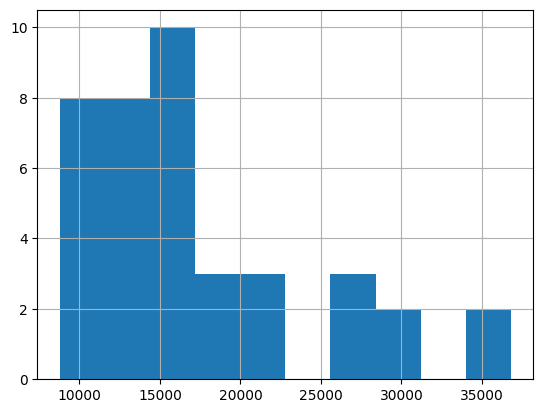

In [11]:
grouped.hist()

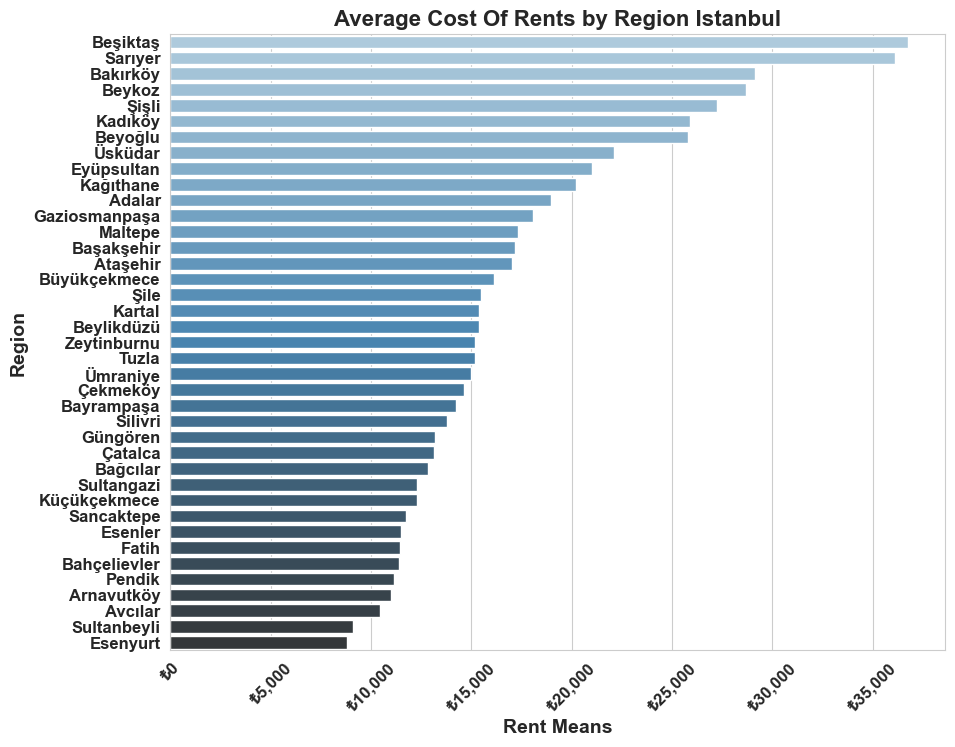

In [204]:
sns.set_style("whitegrid") # set the style
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=grouped.values, y=grouped.index, palette='Blues_d', orient='h')

ax.set_xlabel('Rent Means', fontsize=14,weight="bold")
ax.set_ylabel('Region', fontsize=14,weight="bold")

plt.xticks(rotation=45, fontsize=14,weight="bold")
plt.yticks(fontsize=12,weight="bold")

plt.xticks(fontsize=12)
ax.xaxis.set_major_formatter('₺{x:,.0f}')

ax.set_title('Average Cost Of Rents by Region Istanbul', fontsize=16,weight="bold")

plt.show;

In [52]:
top_5 = grouped.sort_values(ascending=False).head(5)
last_5 = grouped.sort_values(ascending=True).head(5)
filtered = grouped[(grouped >= 10000) & (grouped <= 16000)]

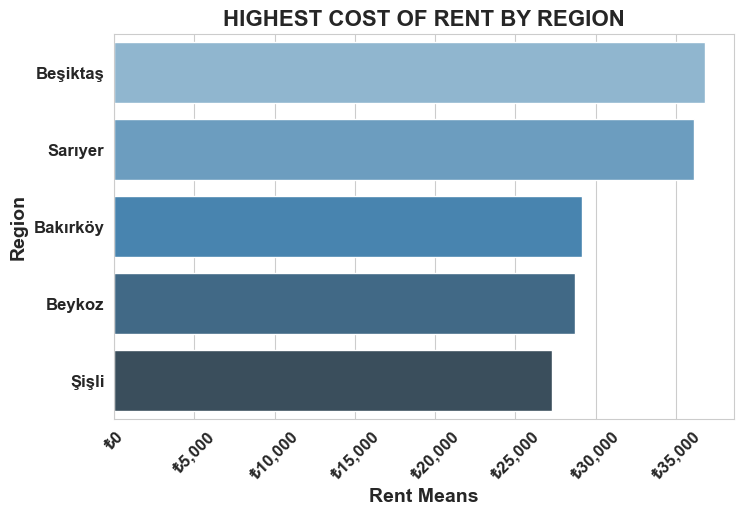

In [30]:
sns.set_style("whitegrid") # set the style
fig, ax1 = plt.subplots(figsize=(8,5))
ax1 = sns.barplot(x=top_5.values, y=top_5.index, palette='Blues_d', orient='h')

ax1.set_xlabel('Rent Means', fontsize=14,weight="bold")
ax1.set_ylabel('Region', fontsize=14,weight="bold")

plt.xticks(rotation=45, fontsize=14,weight="bold")
plt.yticks(fontsize=12,weight="bold")

plt.xticks(fontsize=12)
ax1.xaxis.set_major_formatter('₺{x:,.0f}')

ax1.set_title('HIGHEST COST OF RENT BY REGION', fontsize=16,weight="bold")

plt.show;

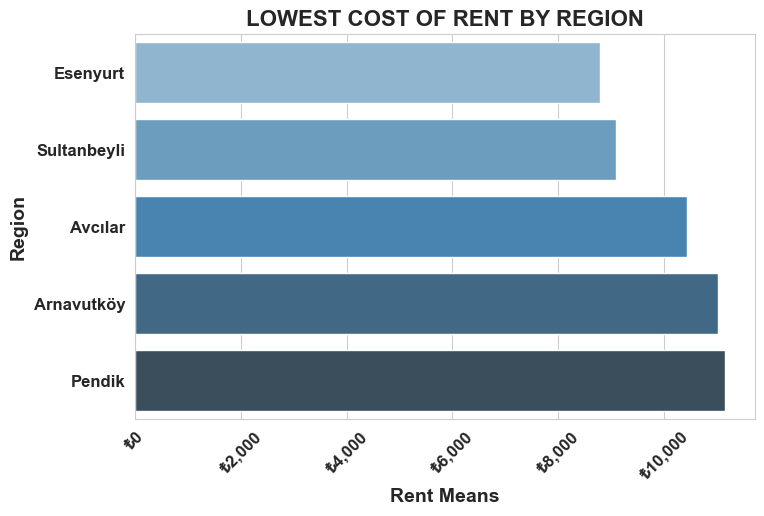

In [32]:
sns.set_style("whitegrid") # set the style
fig, ax2 = plt.subplots(figsize=(8,5))
ax2 = sns.barplot(x=last_5.values, y=last_5.index, palette='Blues_d', orient='h')

ax2.set_xlabel('Rent Means', fontsize=14,weight="bold")
ax2.set_ylabel('Region', fontsize=14,weight="bold")

plt.xticks(rotation=45, fontsize=14,weight="bold")
plt.yticks(fontsize=12,weight="bold")

plt.xticks(fontsize=12)
ax2.xaxis.set_major_formatter('₺{x:,.0f}')

ax2.set_title('LOWEST COST OF RENT BY REGION', fontsize=16,weight="bold")

plt.show;

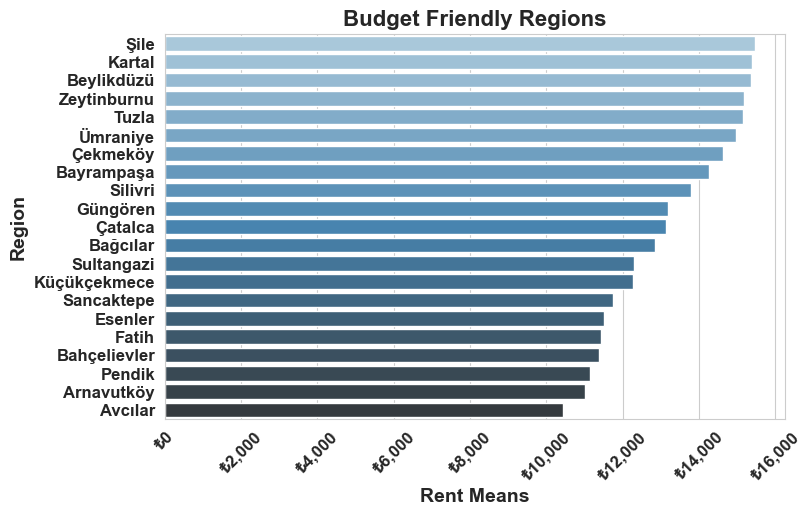

In [96]:
sns.set_style("whitegrid") # set the style
fig, ax2 = plt.subplots(figsize=(8,5))
ax2 = sns.barplot(x=filtered.values, y=filtered.index, palette='Blues_d', orient='h')

ax2.set_xlabel('Rent Means', fontsize=14,weight="bold")
ax2.set_ylabel('Region', fontsize=14,weight="bold")

plt.xticks(rotation=45, fontsize=14,weight="bold")
plt.yticks(fontsize=12,weight="bold")

plt.xticks(fontsize=12)
ax2.xaxis.set_major_formatter('₺{x:,.0f}')

ax2.set_title('Budget Friendly Regions', fontsize=16,weight="bold")

plt.show;

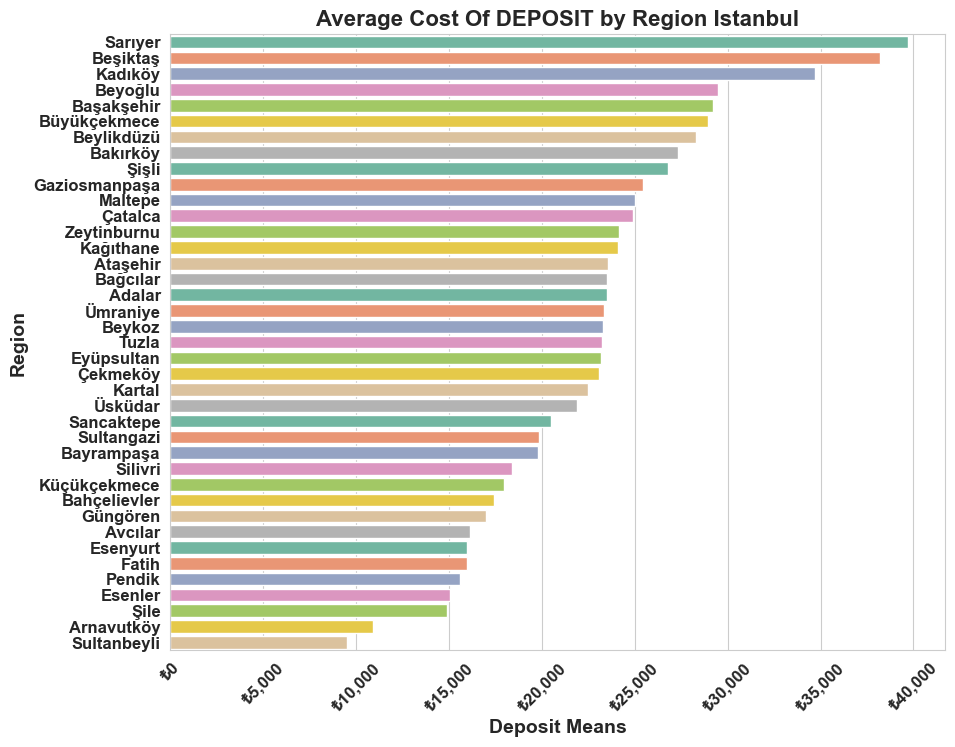

In [106]:
sns.set_style("whitegrid") # set the style
fig, ax = plt.subplots(figsize=(10,8))
ax3 = sns.barplot(x=gropued2.values, y=gropued2.index, palette='Set2', orient='h')

ax3.set_xlabel('Deposit Means', fontsize=14,weight="bold")
ax3.set_ylabel('Region', fontsize=14,weight="bold")

plt.xticks(rotation=45, fontsize=14,weight="bold")
plt.yticks(fontsize=12,weight="bold")

plt.xticks(fontsize=12)
ax3.xaxis.set_major_formatter('₺{x:,.0f}')

ax3.set_title('Average Cost Of DEPOSIT by Region Istanbul', fontsize=16,weight="bold")

plt.show;

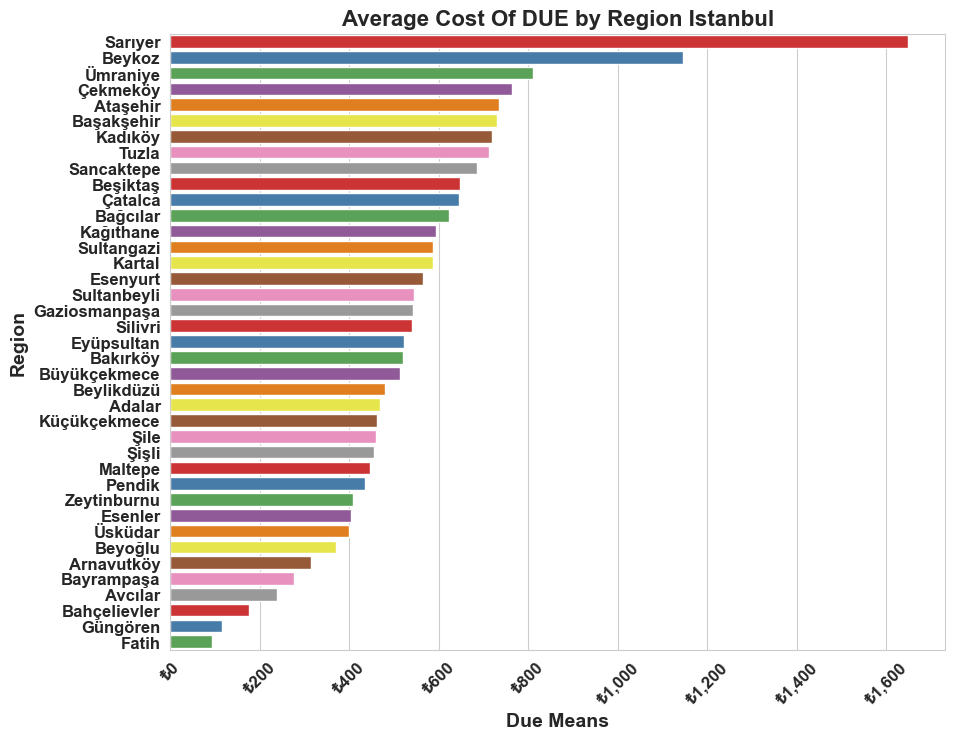

In [113]:
sns.set_style("whitegrid") # set the style
fig, ax = plt.subplots(figsize=(10,8))
ax4 = sns.barplot(x=groped3.values, y=groped3.index, palette='Set1', orient='h')

ax4.set_xlabel('Due Means', fontsize=14,weight="bold")
ax4.set_ylabel('Region', fontsize=14,weight="bold")

plt.xticks(rotation=45, fontsize=14,weight="bold")
plt.yticks(fontsize=12,weight="bold")

plt.xticks(fontsize=12)
ax4.xaxis.set_major_formatter('₺{x:,.0f}')

ax4.set_title('Average Cost Of DUE by Region Istanbul', fontsize=16,weight="bold")

plt.show;

In [289]:
avg_val=pd.DataFrame({"Average Safety Deposit":[25956],"Average Rent Cost":[22448],"Average Due":[610]})

In [136]:
avg_val

,Average Rent Cost,Average Safety Deposit,Average Due
0,22448,25956,610


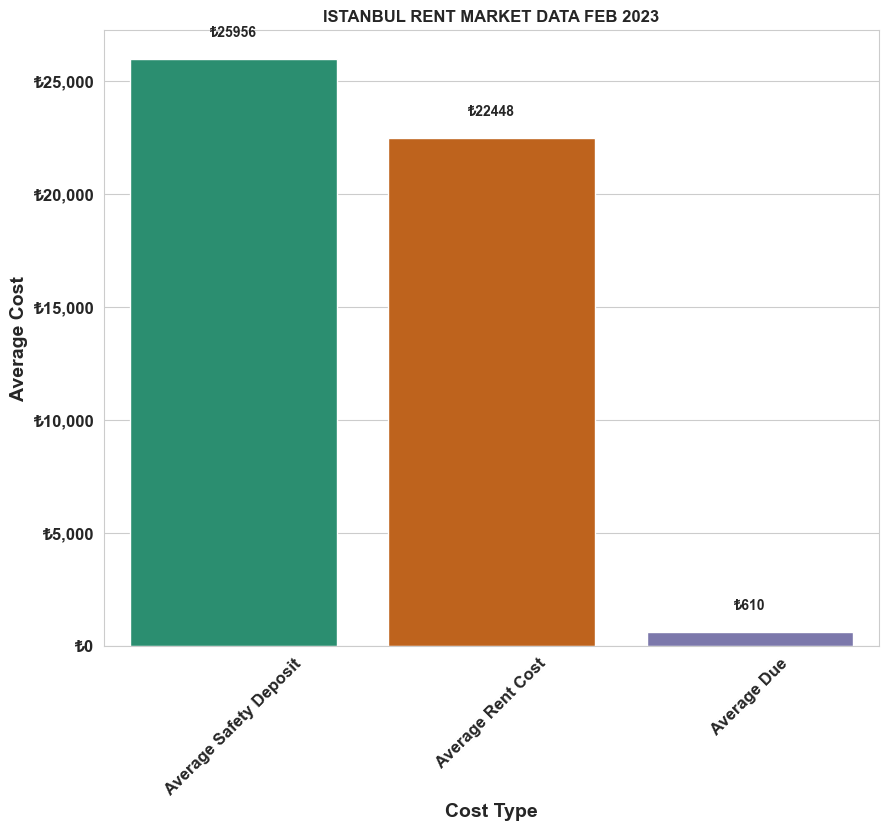

In [290]:
sns.set_style("whitegrid") # set the style
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=avg_val, palette="Dark2", color=['#1f77b4', '#ff7f0e', '#2ca02c'])


ax.set_xlabel('Cost Type', fontsize=14,weight="bold")
ax.set_ylabel('Average Cost', fontsize=14,weight="bold")
ax.yaxis.set_major_formatter('₺{x:,.0f}')

ax.set_title('ISTANBUL RENT MARKET DATA FEB 2023', fontsize=12,weight="bold")

plt.xticks(rotation=45, fontsize=12,weight="bold")
plt.yticks(fontsize=12,weight="bold")

ax = plt.gca()
for i in range(avg_val.shape[1]):
    value = avg_val.iloc[0, i]
    ax.text(i, value + 1000, f"₺{value:.0f}", ha='center',weight="bold")



plt.show;

In [171]:
df["Net Area"].max()

865.0

In [174]:
df["Rent"].max()

80000.0

In [172]:
df["Net Area"].min()

30.0

In [175]:
df.describe()

,Rent,Net Area,Bath,Dues,Deposit
count,9846.000000,9846.000000,9846.000000,9846.000000,9.846000e+03
mean,22448.067743,126.100041,1.438249,302.953484,1.873183e+04
std,16548.997035,73.182056,0.928416,2243.707554,5.546540e+05
min,5000.000000,30.000000,0.000000,0.000000,0.000000e+00
25%,10962.250000,80.000000,1.000000,0.000000,0.000000e+00
50%,16250.000000,110.000000,1.000000,0.000000,0.000000e+00
75%,28000.000000,145.000000,2.000000,100.000000,1.800000e+04
max,80000.000000,865.000000,50.000000,180000.000000,5.500000e+07


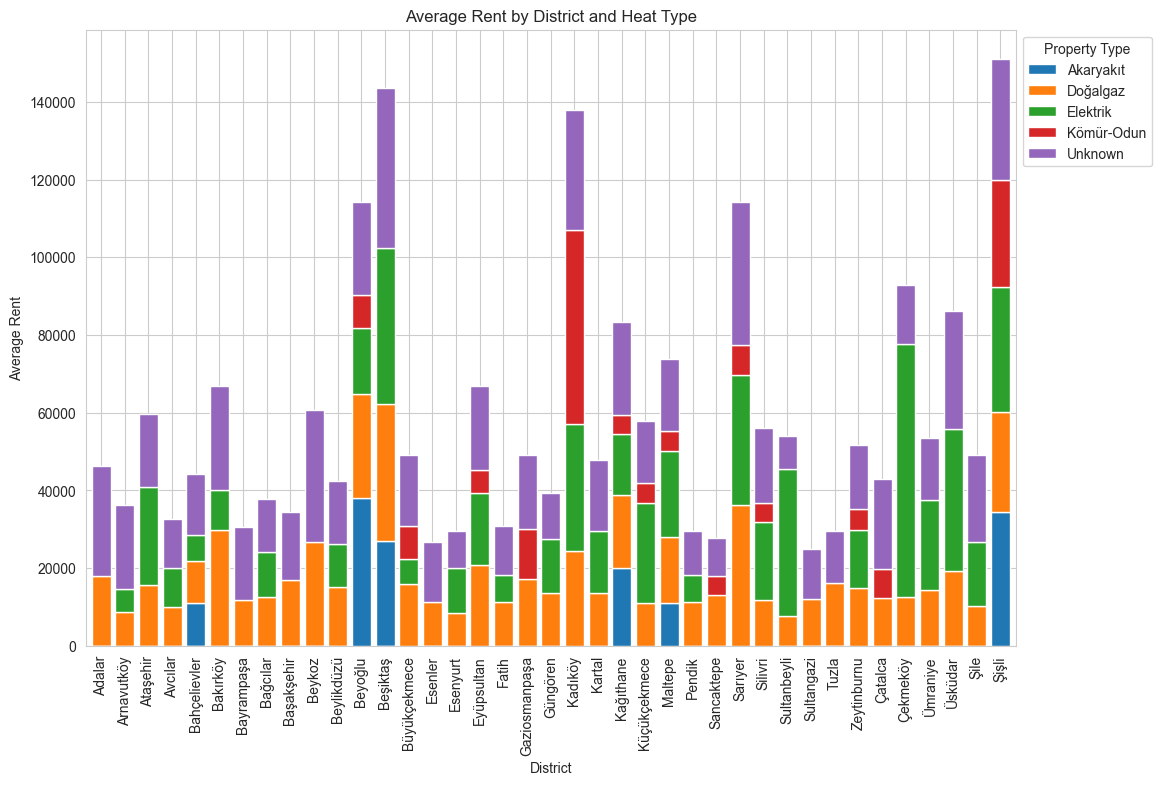

In [177]:

# group the data by district and property type, and get the mean rent for each group
df_grouped2 = df.groupby(['District', 'Heat Type'])['Rent'].mean().unstack()

# create a stacked bar chart
ax8 = df_grouped2.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.8)

# set the title and axis labels
ax8.set_title('Average Rent by District and Heat Type')
ax8.set_xlabel('District')
ax8.set_ylabel('Average Rent')

# set the legend
ax8.legend(title='Property Type', loc='upper left', bbox_to_anchor=(1.0, 1.0))

# show the plot
plt.show()


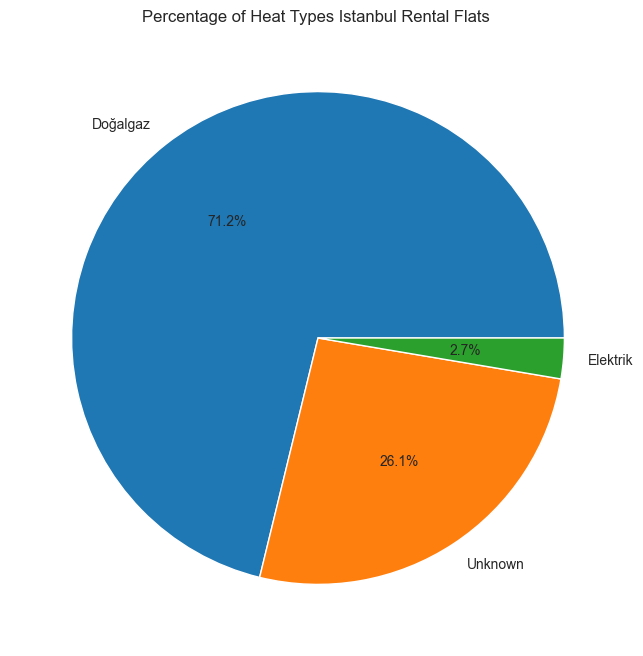

In [188]:
# get the value counts of the 'Heat Type' column
heat_counts = df['Heat Type'].value_counts()

# filter the value counts to include only values bigger than 2%
filtered_heat_counts = heat_counts[heat_counts/len(df) > 0.02]

# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_heat_counts, labels=filtered_heat_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Percentage of Heat Types Istanbul Rental Flats ')

# display the chart
plt.show()


In [222]:
df.head()

,District,Rent,Net Area,Rooms,Bath,NOF,FLOOR,Heat Type,Age,Dues,Deposit
0,Kağıthane,30000.0,85.0,2+1,1.0,5 Katlı,3. Kat,Doğalgaz,Sıfır Bina,0.0,0.0
1,Kağıthane,25000.0,70.0,1+1,1.0,5 Katlı,3. Kat,Doğalgaz,Sıfır Bina,0.0,0.0
2,Ümraniye,9500.0,50.0,1+1,1.0,4 Katlı,Bahçe Katı,Unknown,5 Yaşında,0.0,0.0
3,Kağıthane,30000.0,110.0,1+1,1.0,5 Katlı,5. Kat,Doğalgaz,Sıfır Bina,0.0,0.0
4,Beşiktaş,36000.0,135.0,2+1,2.0,4 Katlı,1. Kat,Doğalgaz,23 Yaşında,0.0,38000.0


In [205]:
df= df.loc[(df["Net Area"] >= 30) & (df["Net Area"] <= 200),:]

In [190]:
average_net_area = df.groupby('District')['Net Area'].mean()

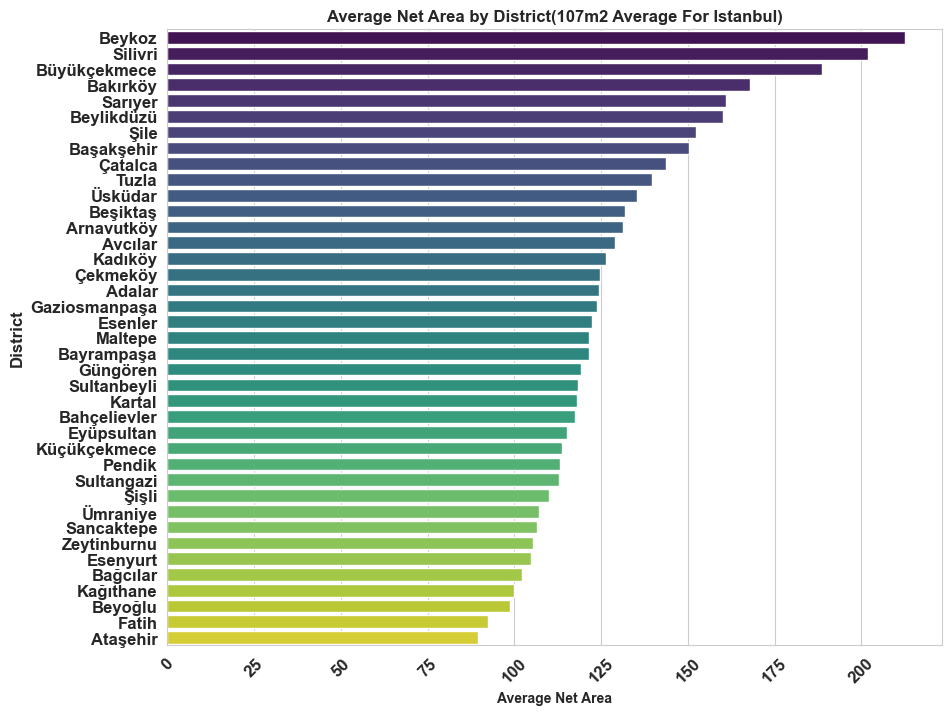

In [236]:

# group by district and calculate the mean net area
district_net_area = df.groupby('District')['Net Area'].mean().sort_values(ascending=False)

# create a horizontal bar chart
plt.figure(figsize=(10,8))
sns.barplot(x=district_net_area.values, y=district_net_area.index, palette='viridis')

# set the x and y labels
plt.xlabel('Average Net Area',weight="bold")
plt.ylabel("District",weight="bold",fontsize=12)
plt.xticks(rotation=45, fontsize=12,weight="bold")
plt.yticks(fontsize=12,weight="bold")

# set the title of the chart
plt.title('Average Net Area by District(107m2 Average For Istanbul)',weight="bold")

# display the chart
plt.show();


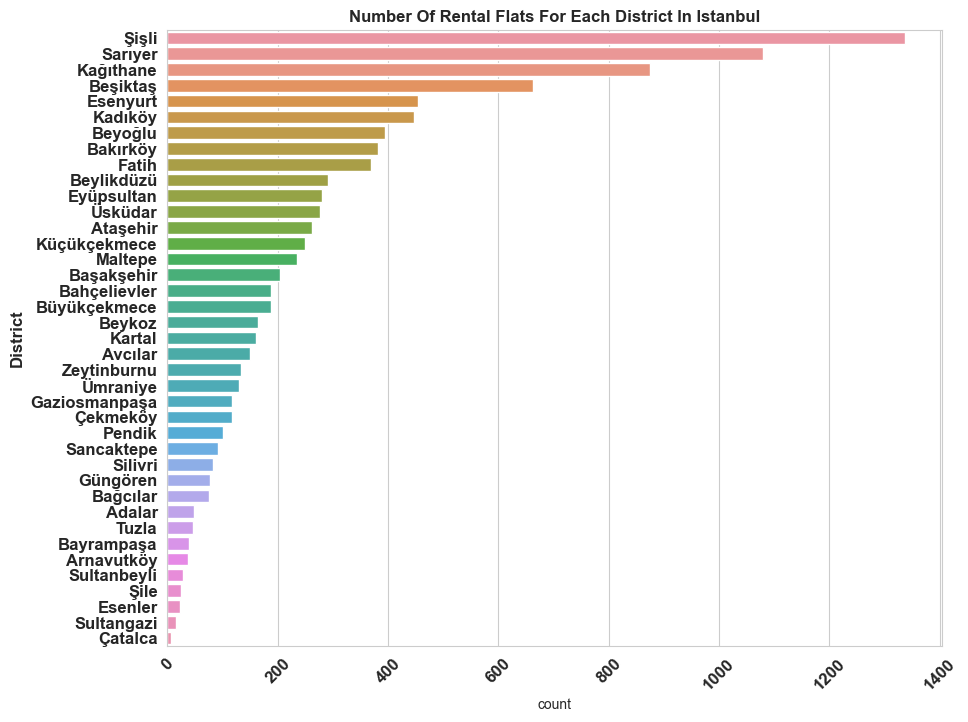

In [232]:
# Count the values for each district
district_counts = df['District'].value_counts()

# Create a count plot using Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))


plt.ylabel("District",weight="bold",fontsize=12)

plt.xticks(rotation=45, fontsize=12,weight="bold")
plt.yticks(fontsize=12,weight="bold")
plt.title("Number Of Rental Flats For Each District In Istanbul",weight="bold")

sns.countplot(y='District', data=df, order=district_counts.index);


In [248]:
df["Rooms"].unique

<bound method Series.unique of 0           2+1
1           1+1
2           1+1
3           1+1
4           2+1
         ...   
9841        3+1
9842        2+1
9843        1+1
9844    Unknown
9845        1+0
Name: Rooms, Length: 9846, dtype: object>

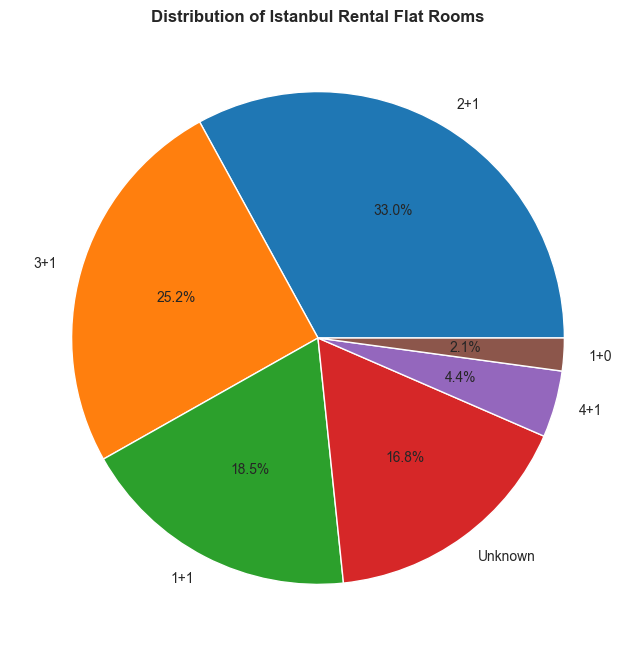

In [254]:
room_counts = df['Rooms'].value_counts()
filtered_room_counts = room_counts[room_counts/len(df) > 0.01]
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_room_counts, labels=filtered_room_counts.index, autopct='%1.1f%%')

# Set the title of the chart
plt.title('Distribution of Istanbul Rental Flat Rooms',weight="bold")

# Display the chart
plt.show;

In [280]:
filtered_df = df.groupby(['District', 'Rooms']).filter(lambda x: len(x) > 20)

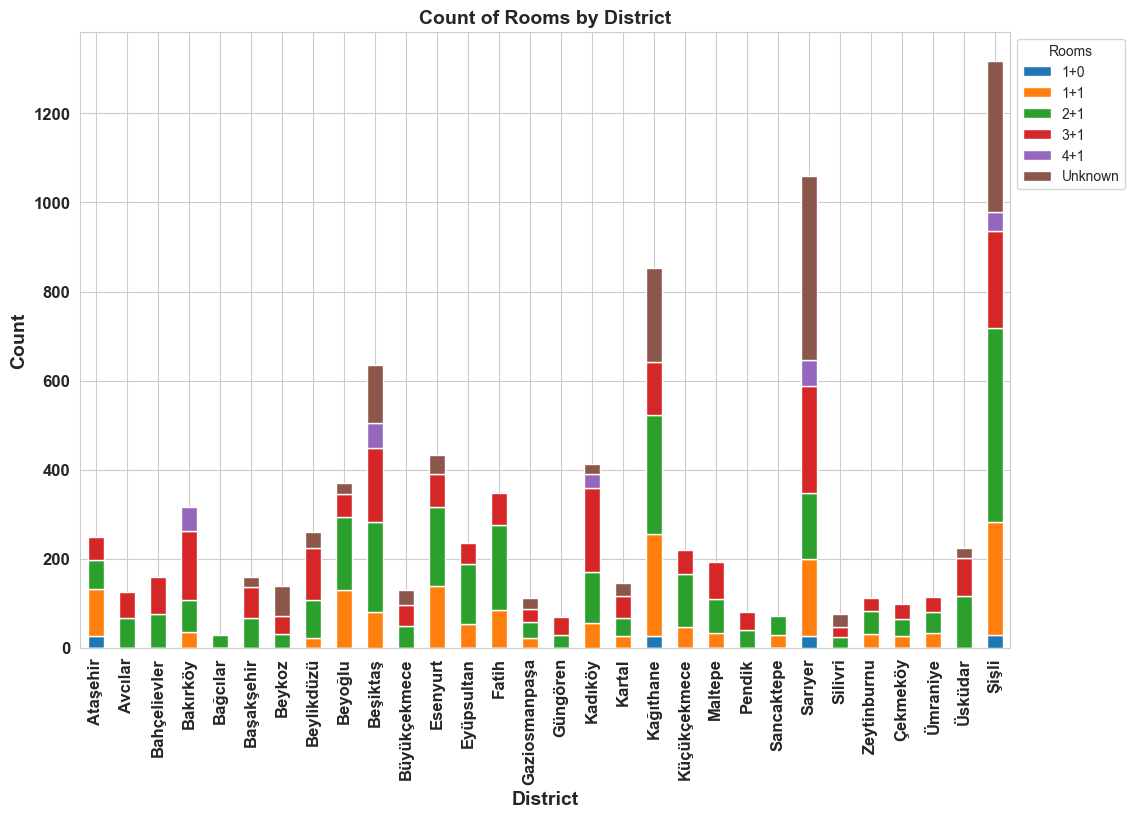

In [282]:
# group by district and rooms, and count the number of occurrences
room_counts = filtered_df.groupby(['District', 'Rooms']).size().unstack(fill_value=0)

# create stacked bar chart
room_counts.plot(kind='bar', stacked=True, figsize=(12,8))

# add title and axis labels
plt.title('Count of Rooms by District',weight="bold",fontsize=14)
plt.xlabel('District',weight="bold",fontsize=14)
plt.ylabel('Count',weight="bold",fontsize=14)

plt.xticks(fontsize=12,weight="bold")
plt.yticks(fontsize=12,weight="bold")
# show legend
plt.legend(title='Rooms', bbox_to_anchor=(1, 1), loc='upper left')

# display the chart
plt.show();

In [5]:
df["Rooms"]=df["Rooms"].astype(str)
df["Rooms"]=df["Rooms"].str[:1]

In [6]:
df["Rooms"].unique()

array(['2', '1', '3', '4', 'U', '5', '6', '7', '9'], dtype=object)

In [7]:
df["Rooms"]=df["Rooms"].apply(lambda x : 0 if x =="U" else x)
df["Rooms"]=df["Rooms"].fillna(0)
df["Rooms"]=df["Rooms"].astype(int)

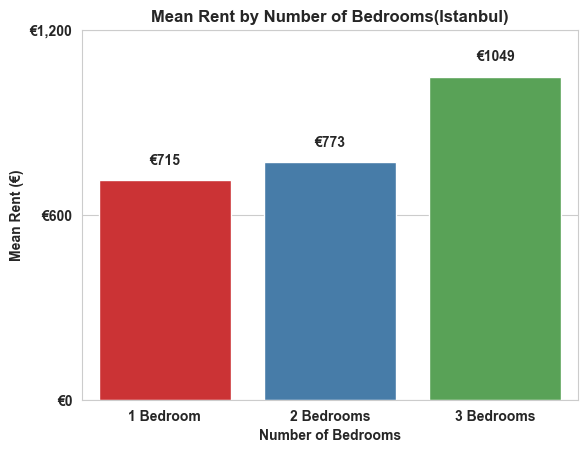

In [10]:
### Calculate mean rent for each group + add expenses ###
one_bed_mean_rent = df[df['Rooms'] == 1]['Rent'].mean()*0.047
two_bed_mean_rent = df[df['Rooms'] == 2]['Rent'].mean()*0.047
three_bed_mean_rent = df[df['Rooms'] == 3]['Rent'].mean()*0.047

### Create a bar plot ###
sns.set_style("whitegrid")
ax = sns.barplot(x=['1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(['1 Bedroom', '2 Bedrooms','3 Bedrooms'], weight='bold')
ax.set_yticks([0, 600, 1200])
ax.set_yticklabels(['€0', '€600', '€1,200'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Istanbul)', weight='bold')

plt.show();